# Evaluation of data


## Metrics
$$
\begin{rcases}
      \text{Avg Learning Coop} \\
      \text{Avg Learning Comp} \\
      \text{CoopFreq} \\
\end{rcases} \propto \frac{\Delta A}{\Delta t}
$$
* Escaped : $\propto $ total 
* Dead : $\propto $ total 
* Per case : $\propto a:b:c$


## Parameter search
* ttest
* grid search

In [1]:
## Library importing
import numpy as np
import pandas as pd
import os
import dataclasses
from dataclasses import dataclass
from shutil import rmtree
import matplotlib.pyplot as plt
from glob import glob
from itertools import islice
import scipy.stats as ss

In [2]:

from typing import Optional



@dataclass
class FileHandler:
    name                   : Optional[str]                 = None
    AspirationArea         : Optional[tuple[pd.DataFrame]] = None
    AverageLearningComp    : Optional[tuple[pd.DataFrame]] = None
    AverageLearningCoop    : Optional[tuple[pd.DataFrame]] = None
    CoopFrequency          : Optional[tuple[pd.DataFrame]] = None
    Death                  : Optional[tuple[pd.DataFrame]] = None
    Escaped                : Optional[tuple[pd.DataFrame]] = None
    RatioDistance          : Optional[tuple[pd.DataFrame]] = None
    RewardAspiration       : Optional[tuple[pd.DataFrame]] = None
    StdLearningComp        : Optional[tuple[pd.DataFrame]] = None
    StdLearningCoop        : Optional[tuple[pd.DataFrame]] = None
    StdLearningCoop        : Optional[tuple[pd.DataFrame]] = None
    RewardGameDistance     : Optional[tuple[pd.DataFrame]] = None


In [3]:
# Misc functions

def list_dir_with_path(p : os.PathLike) -> list[os.PathLike]:
    '''
    List subdirectory, with the real path attched to it
    '''
    return [ os.path.realpath(os.path.join(p,i)) for i in os.listdir(p)]
def merge_two_frames(df1 : pd.DataFrame, df2 : pd.DataFrame, group_by: list[str], red_func : str) -> pd.DataFrame:
    """
    Merge two dataframes based on grouped keys. Reminder you need to add your own aggregation method
    For example
        Parameters:
            df1 (pd.DataFrame) : Pandas Dataframe
            df2 (pd.DataFrame) : Pandas Dataframe
            groupby (list[str]) : List of strings to group the two dataframes by
        
        Returns:
            merged_df pd.Dataframe : Merged Pandas dataframe, without an aggregated method
    """
    assert red_func in ["sum", "std", "mean"]

    concated = pd.concat([df1,df2],ignore_index=True,sort=False)
    if len(group_by) == 0:
        return concated
    concated = concated.groupby(group_by, as_index=False)
    match red_func:
        case "sum":
            return concated.sum()
        case "mean":
            return concated.mean()
        case "std":
            return concated.std(ddof=0.)    
            

In [4]:
from functools import reduce
import re
# Get current directory and all necessary folders
# and write data
cwd = os.path.realpath(os.path.dirname(os.getcwd()))
output_wd = os.path.realpath(os.path.join(
    cwd, "..",  "output"
))

output_dirs = list_dir_with_path(output_wd)
files = [FileHandler() for _ in range(len(output_dirs))]
keys =  {
    "AspirationArea" : ["Fire Area"],
    "AverageLearningComp" : ["Time"],
    "AverageLearningCoop" : ["Time"],
    "CoopFrequency" : ["Time"],
    "Death" : ["Time step"],
    "Escaped" : ["Time step"],
    "RatioDistance"      : [],
    "RewardAspiration"   : [],
    "RewardGameDistance" : [],
    "StdLearningComp"    : [],
    "StdLearningCoop"    : [],
}

def read_from_csv(x:str) -> pd.DataFrame:
    df = pd.read_csv(x)
    if re.search("RewardAspiration",x) :
        print(df.iloc[:,0].value_counts())
    df = df.drop(columns=["series"])
    return df

for (fh, output_dir) in zip(files, output_dirs):
    dirs = list_dir_with_path(output_dir)
    for name in os.listdir(output_dir):
        it_avg = map(read_from_csv,list_dir_with_path(os.path.realpath(os.path.join(output_dir, name))))
        it_std  = map(read_from_csv,list_dir_with_path(os.path.realpath(os.path.join(output_dir, name))))
        
        red_avg = reduce(lambda x,y: merge_two_frames(x,y,keys[name],"mean"), it_avg)
        red_std = reduce(lambda x,y: merge_two_frames(x,y,keys[name],"std"), it_std)
        setattr(fh, name, (red_avg,red_std))
    fh.name = os.path.split(output_dir)[-1]

AllButOneCoop    212
AllCoop          139
Argument          87
Name: series, dtype: int64
AllCoop          183
AllButOneCoop    152
Argument          67
Name: series, dtype: int64
AllButOneCoop    214
AllCoop          163
Argument          70
Name: series, dtype: int64
AllButOneCoop    238
AllCoop          192
Argument         107
Name: series, dtype: int64
AllButOneCoop    207
AllCoop          201
Argument          96
Name: series, dtype: int64
AllButOneCoop    260
AllCoop          179
Argument          69
Name: series, dtype: int64
AllButOneCoop    235
AllCoop          190
Argument         100
Name: series, dtype: int64
AllButOneCoop    213
AllCoop          142
Argument          79
Name: series, dtype: int64
AllButOneCoop    176
AllCoop          165
Argument          38
Name: series, dtype: int64
AllCoop          207
AllButOneCoop    200
Argument          56
Name: series, dtype: int64
AllButOneCoop    221
AllCoop          207
Argument          88
Name: series, dtype: int64
AllButOneC

In [5]:
for f in files:
    print(f.name)

f_s_test_val_0.15_out
f_s_test_val_0.1_out
f_s_test_val_0.25_out
f_s_test_val_0.2_out
f_s_test_val_0.35_out
f_s_test_val_0.3_out
f_s_test_val_0.45_out
f_s_test_val_0.4_out
f_s_test_val_0.55_out
f_s_test_val_0.5_out
f_s_test_val_0.65_out
f_s_test_val_0.6_out
f_s_test_val_0.7_out


In [6]:

import matplotlib.colors as mcolors
colors = list(mcolors.XKCD_COLORS.keys())

## Plotting the data

Plot between all * 2
### Aspiration Area


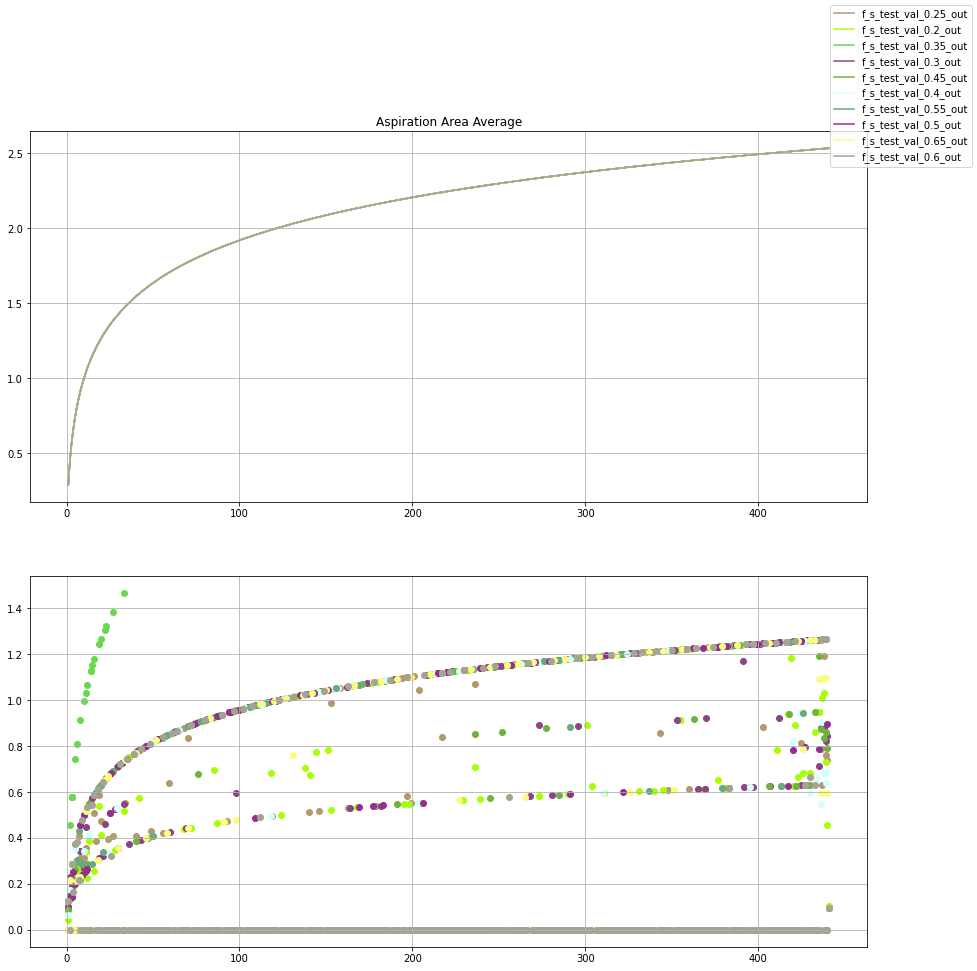

In [7]:
%matplotlib inline
fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)

for i in islice(range(2,len(files)),10):
    ax[0].plot(files[i].AspirationArea[0].iloc[:,0], files[i].AspirationArea[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].scatter(files[i].AspirationArea[1].iloc[:,0], files[i].AspirationArea[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Aspiration Area Standard Deviation")
ax[0].grid(True)
ax[0].set_title(f"Aspiration Area Average")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels, )
plt.show()

### Average learning rate competition

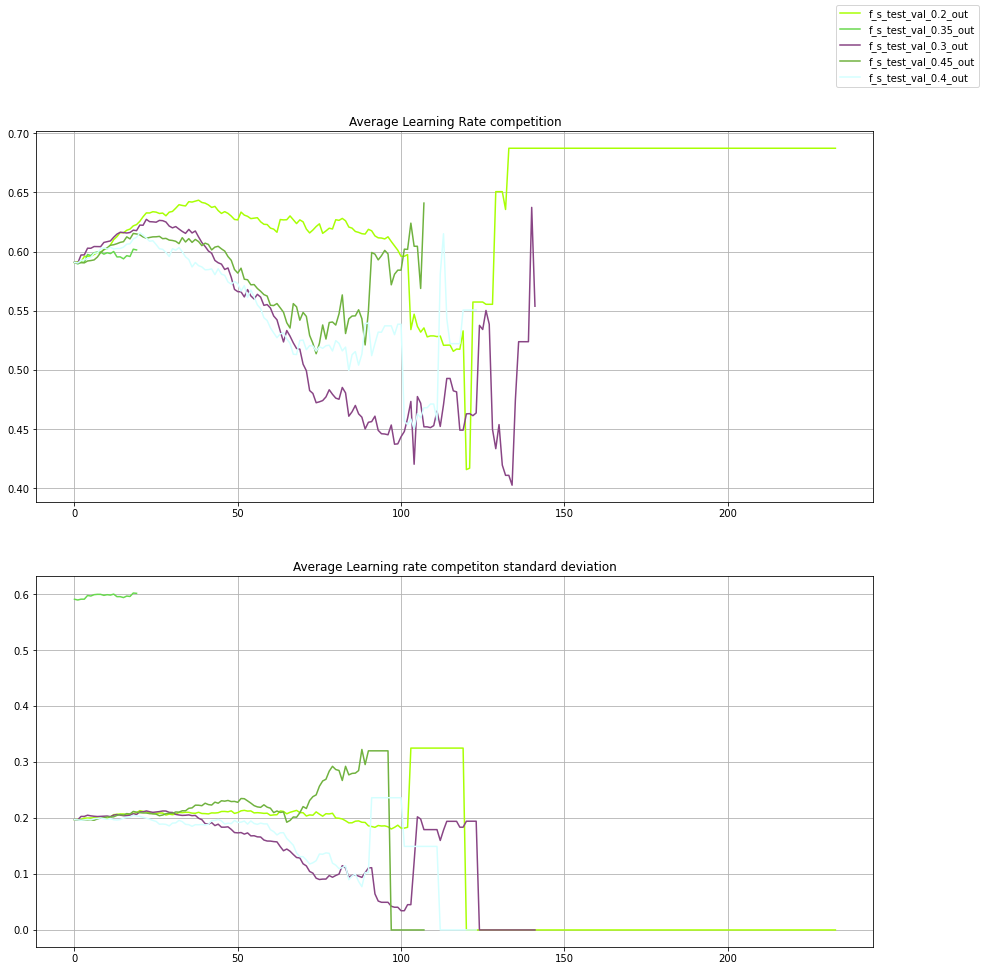

In [18]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 3
for i in itertools.islice(range(start,len(files)), 5):
    ax[0].plot(files[i].AverageLearningComp[0].iloc[:,0], files[i].AverageLearningComp[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].AverageLearningComp[1].iloc[:,0], files[i].AverageLearningComp[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate competition")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate competiton standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Average learning rate cooperation

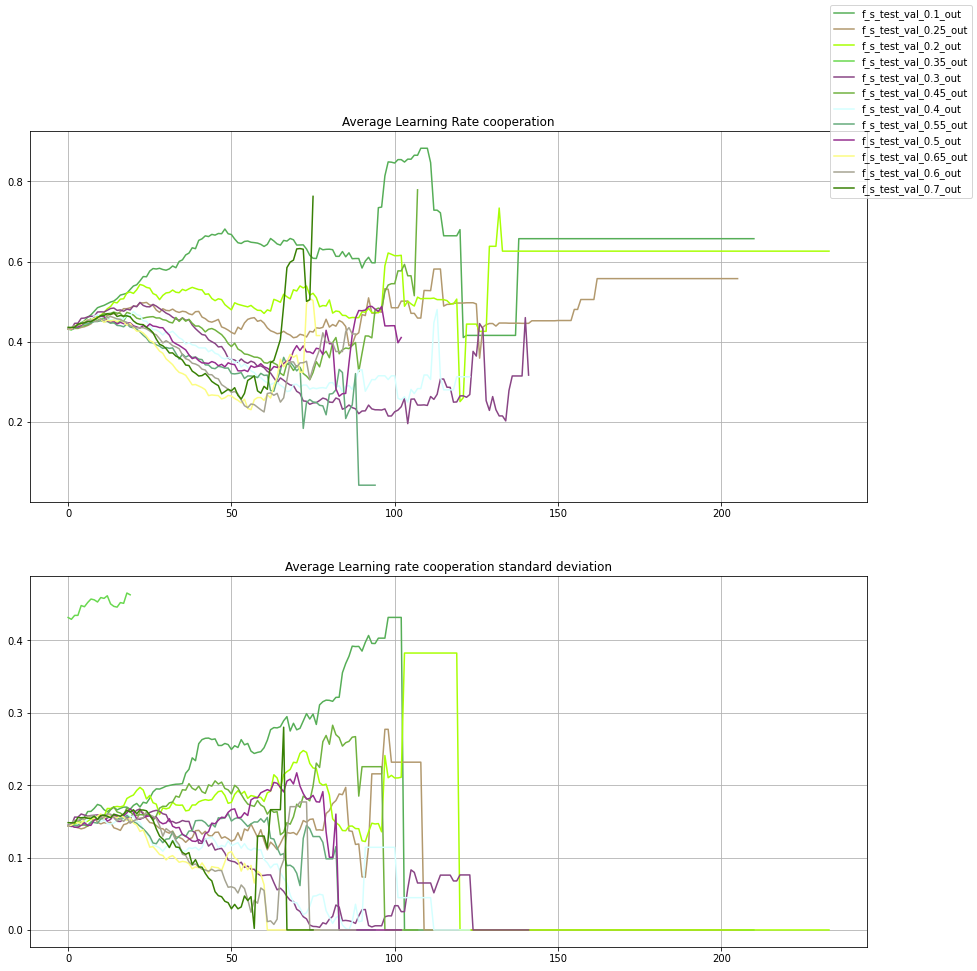

In [9]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 1
for i in itertools.islice(range(start,len(files)), 12):
    ax[0].plot(files[i].AverageLearningCoop[0].iloc[:,0], files[i].AverageLearningCoop[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].AverageLearningCoop[1].iloc[:,0], files[i].AverageLearningCoop[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate cooperation")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate cooperation standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Standard deviation of learning competition

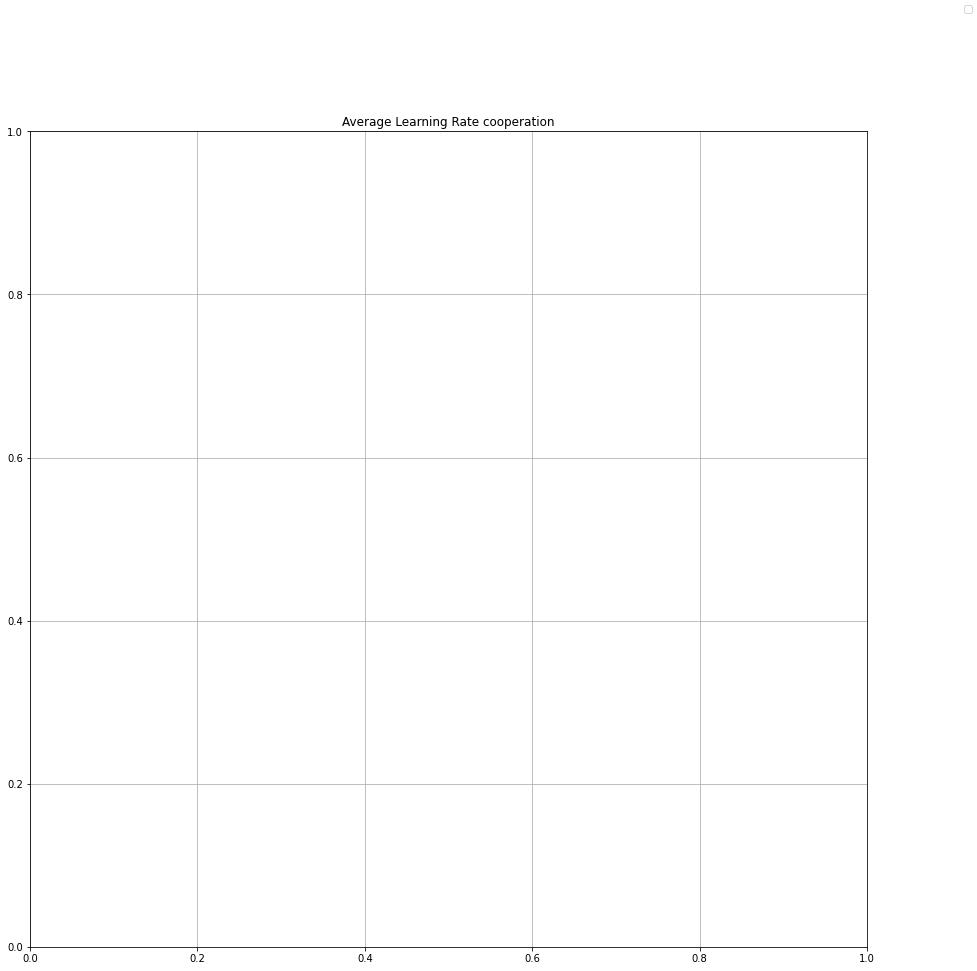

In [10]:
%matplotlib inline
import itertools


fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
start = 8
for i in itertools.islice(range(start,len(files[start:])), 3):
    ax.scatter(files[i].StdLearningComp[0].iloc[:,0], files[i].StdLearningComp[0].iloc[:,1],color=colors[i],label=files[i].name)
ax.set_title(f"Average Learning Rate cooperation")
ax.grid(True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels)

### Standard deviation of learning cooperation

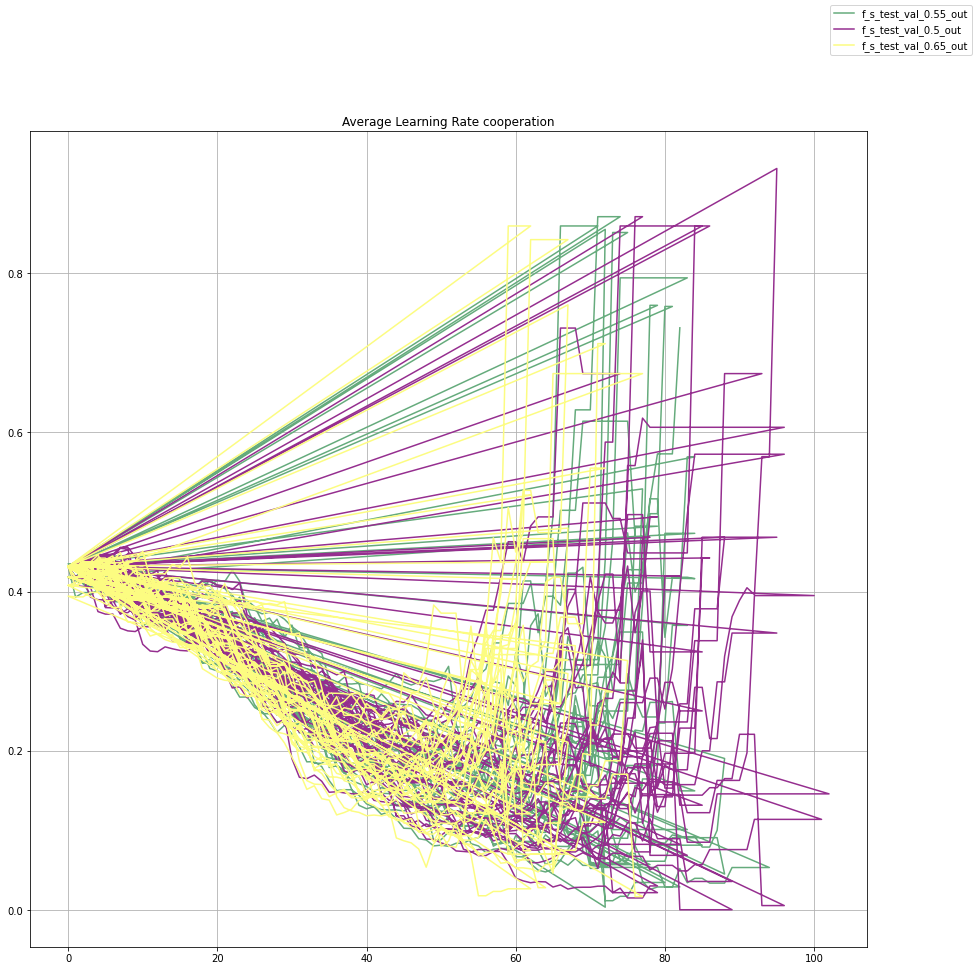

In [11]:
%matplotlib inline
import itertools


fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
start = 8
for i in itertools.islice(range(start,len(files)), 3):
    ax.plot(files[i].StdLearningCoop[0].iloc[:,0], files[i].StdLearningCoop[0].iloc[:,1],color=colors[i],label=files[i].name)
ax.set_title(f"Average Learning Rate cooperation")
ax.grid(True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels)

### Cooperation Frequency

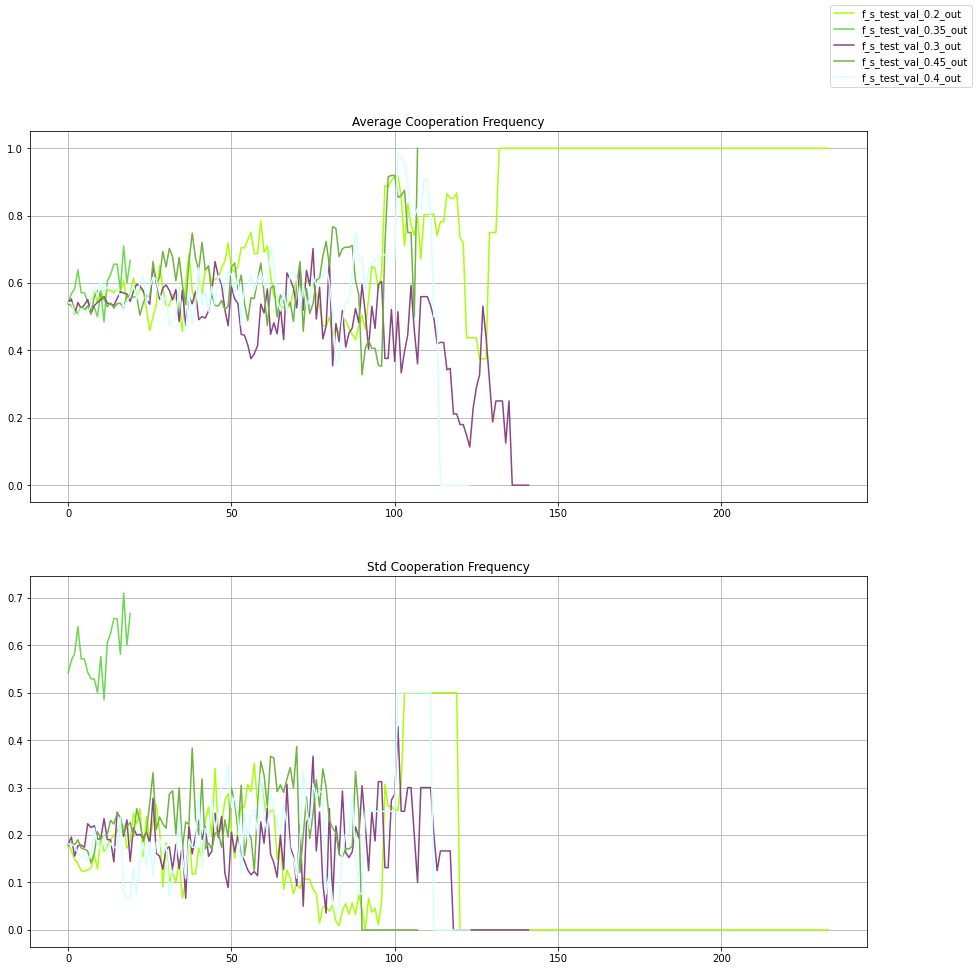

In [20]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 3
for i in itertools.islice(range(start,len(files)), 5):
    ax[0].plot(files[i].CoopFrequency[0].iloc[:,0], files[i].CoopFrequency[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].CoopFrequency[1].iloc[:,0], files[i].CoopFrequency[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Cooperation Frequency")
ax[0].grid(True)
ax[1].set_title(f"Std Cooperation Frequency")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)
plt.show()

### Deaths over time

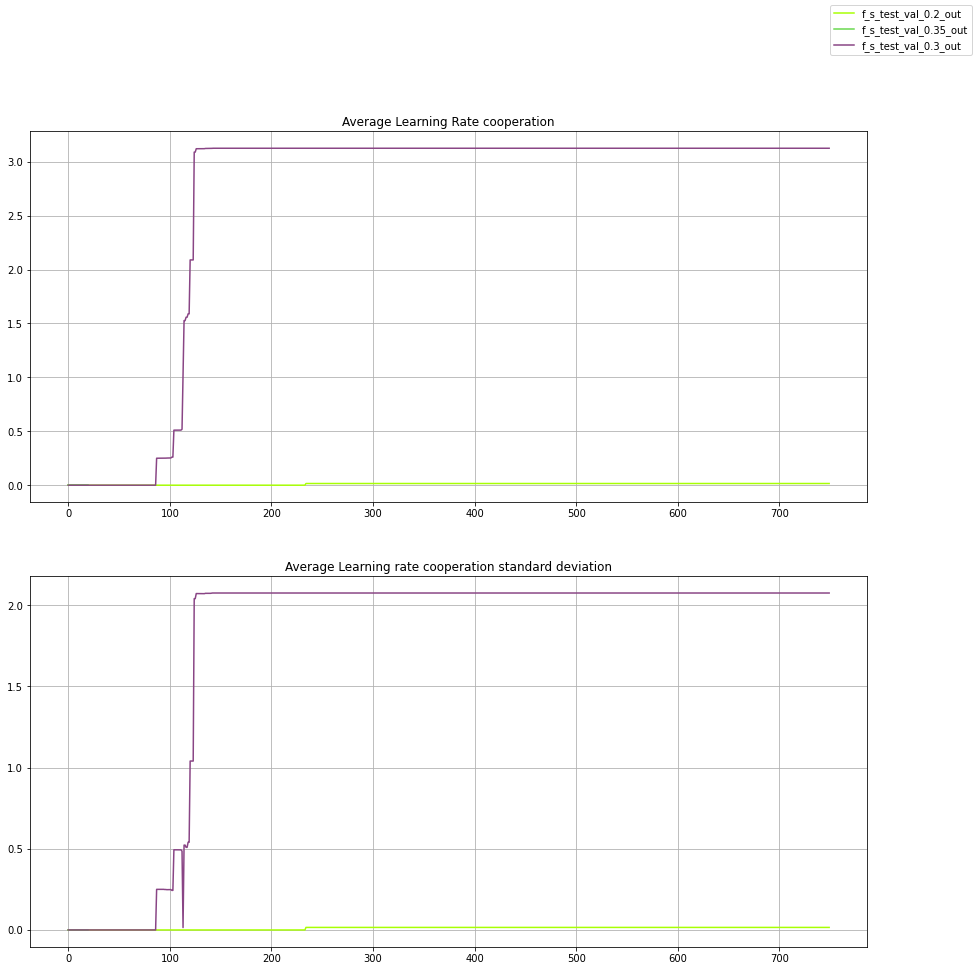

In [22]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 3
for i in itertools.islice(range(start,len(files)), 3):
    ax[0].plot(files[i].Death[0].iloc[:,0], files[i].Death[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].Death[1].iloc[:,0], files[i].Death[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate cooperation")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate cooperation standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)

### Escapees over time

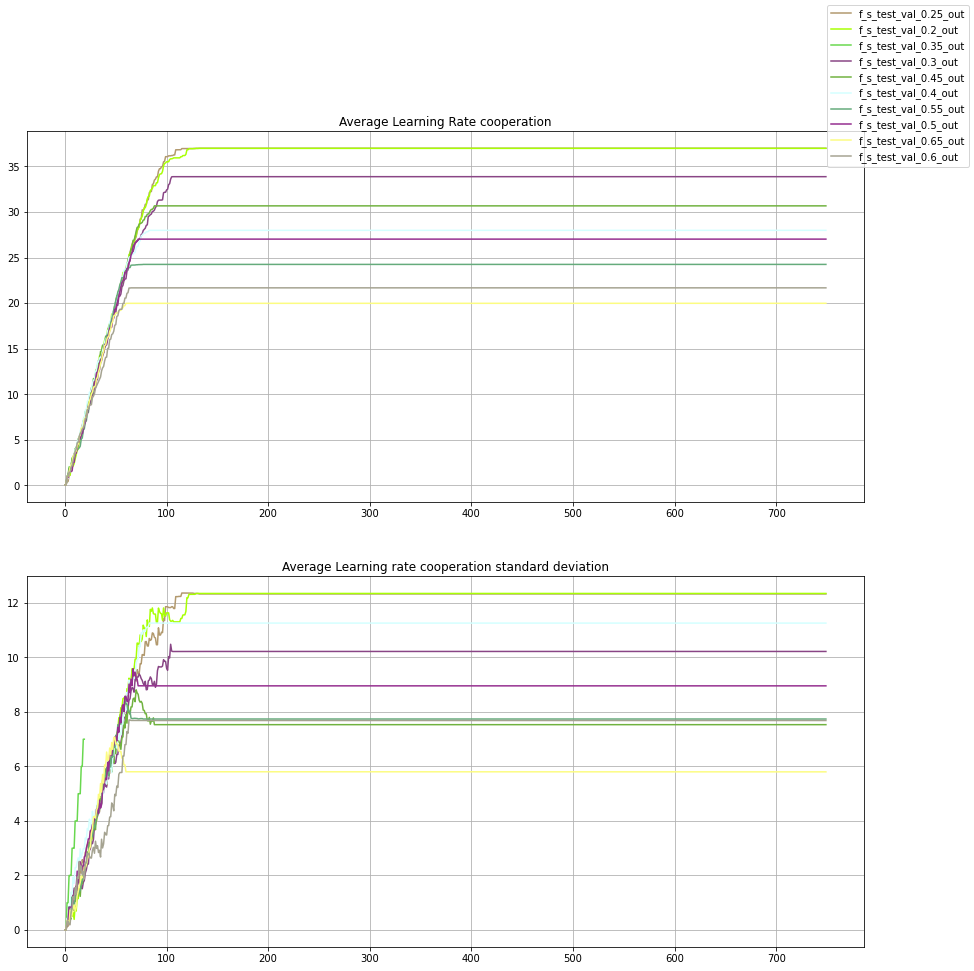

In [14]:
%matplotlib inline
import itertools


fig,ax = plt.subplots(2)
fig.set_figwidth(15)
fig.set_figheight(15)
start = 2
for i in itertools.islice(range(start,len(files)), 10):
    ax[0].plot(files[i].Escaped[0].iloc[:,0], files[i].Escaped[0].iloc[:,1],color=colors[i],label=files[i].name)
    ax[1].plot(files[i].Escaped[1].iloc[:,0], files[i].Escaped[1].iloc[:,1],color=colors[i],label=files[i].name)
ax[0].set_title(f"Average Learning Rate cooperation")
ax[0].grid(True)
ax[1].set_title(f"Average Learning rate cooperation standard deviation")
ax[1].grid(True)    
handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles,labels)

### Ratio Distance

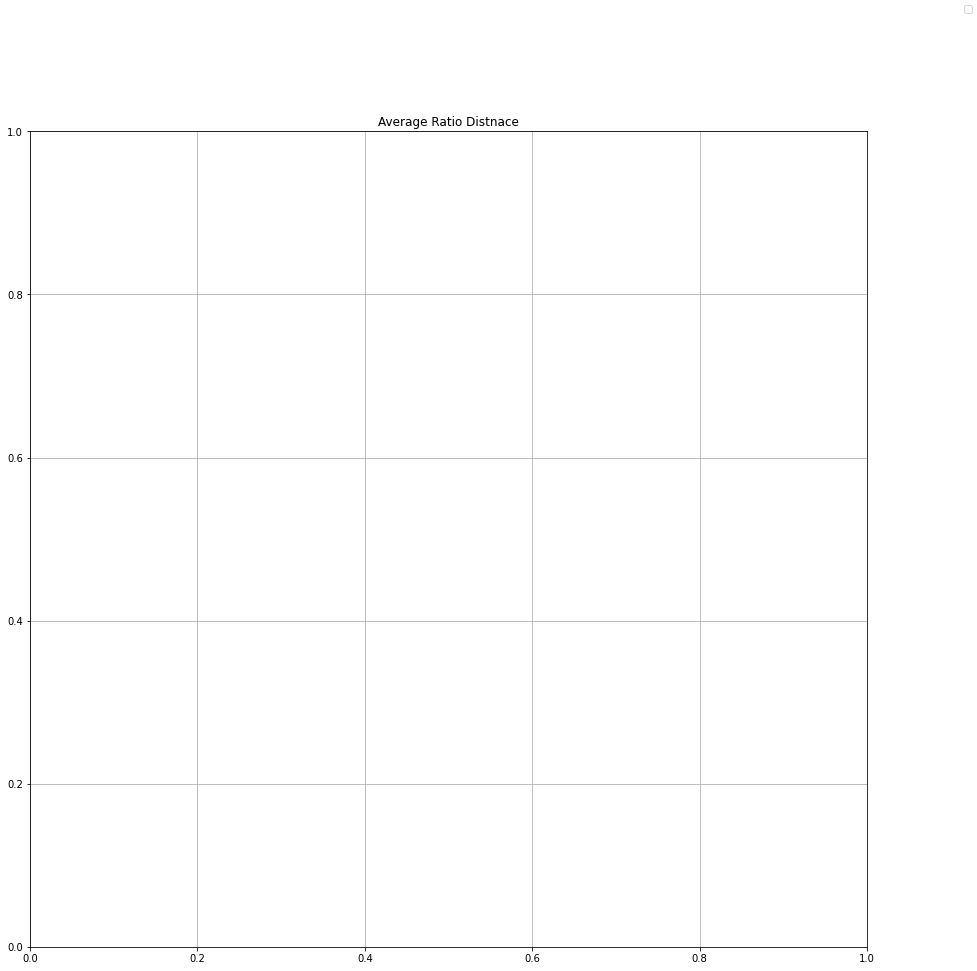

In [15]:
%matplotlib inline
import itertools


fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
start = 8
for i in itertools.islice(range(start,len(files[start:])), 3):
    ax.scatter(files[i].RatioDistance[0].iloc[:,0], files[i].RatioDistance[0].iloc[:,1],color=colors[i],label=files[i].name)
ax.set_title(f"Average Ratio Distnace")
ax.grid(True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels)

### Reward over Aspiration

4351 10038
5451 8614
3697 11340
3813 10996
17 70


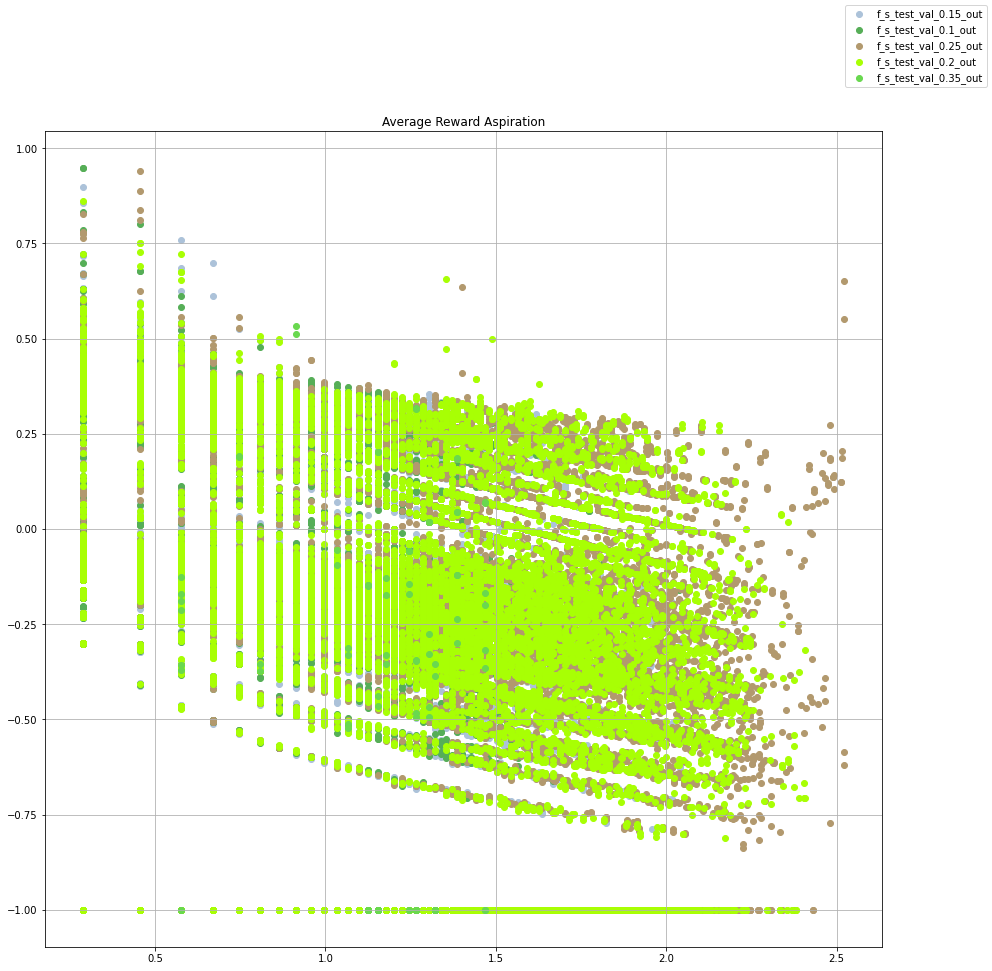

In [16]:
%matplotlib inline
import itertools


fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
start = 0

for i in itertools.islice(range(start,len(files)), 5):
    f = files[i].RewardAspiration[0]
    ax.scatter(f.iloc[:,0], files[i].RewardAspiration[0].iloc[:,1],color=colors[i],label=files[i].name)
    print((f.iloc[:,1] > 0).sum(), (f.iloc[:,1] <= 0).sum())
ax.set_title(f"Average Reward Aspiration")
ax.grid(True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels)

## Reward of game over distance

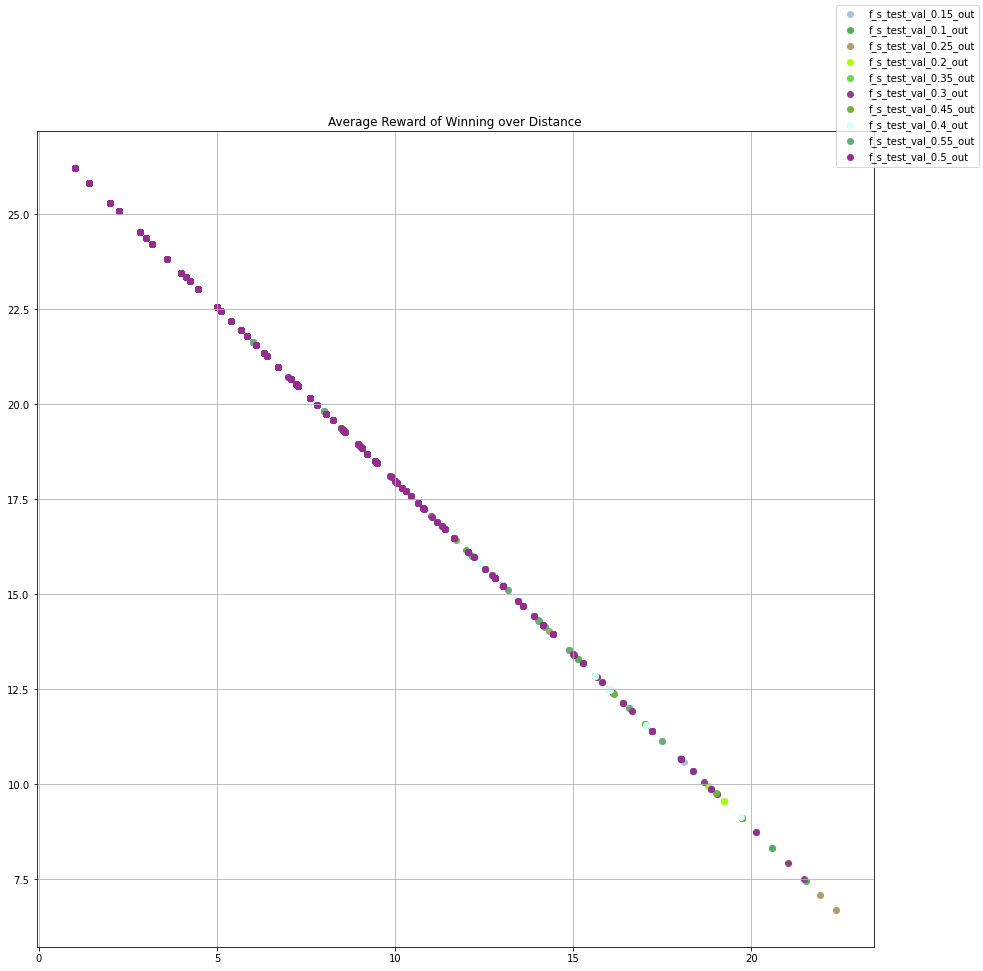

In [17]:
%matplotlib inline
import itertools


fig,ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(15)
start = 0
for i in itertools.islice(range(start,len(files[start:])), 10):
    ax.scatter(files[i].RewardGameDistance[0].iloc[:,0], files[i].RewardGameDistance[0].iloc[:,1],color=colors[i],label=files[i].name)
ax.set_title(f"Average Reward of Winning over Distance")
ax.grid(True)
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles,labels)